## Exercise 1 Time series analysis

#### **Key concepts**

##### **Time series**
A time series is a sequence of data collected at successive time intervals, usually evenly spaced.

##### **Time series forecasting**
Time series forecasting involves forecasting and extrapolin future trends or values based on old data points (supervised time-series forecasting), clustering them into groups, and predicting future patterns (unsupervised time-series forecasting).

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from config.config_file import PATH_TEMPERATURE_DATA_FILE

#### Load data from csv file

In [16]:
data = pd.read_csv(PATH_TEMPERATURE_DATA_FILE, sep=';', index_col=0)
data

,Date,Temp
0,1981-01-01,"20,7"
1,1981-01-02,"17,9"
2,1981-01-03,"18,8"
3,1981-01-04,"14,6"
4,1981-01-05,"15,8"
...,...,...
3645,1990-12-27,"14,0"
3646,1990-12-28,"13,6"
3647,1990-12-29,"13,5"
3648,1990-12-30,"15,7"


#### Transformations
Convert the 'Date' column into a datetime.<br>
Convert the 'Temp' values into floats with '.' as decimal separator.
Set the 'Date' column as the index (necessary to process time series)


In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data['Temp'] = data['Temp'].str.replace(',', '.', regex=False).astype(float)
data.set_index('Date', inplace=True)
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


#### Check for null values and describe the dataset

In [18]:
print(data.isnull().sum())
print(data.describe())

Temp    0
dtype: int64
              Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000


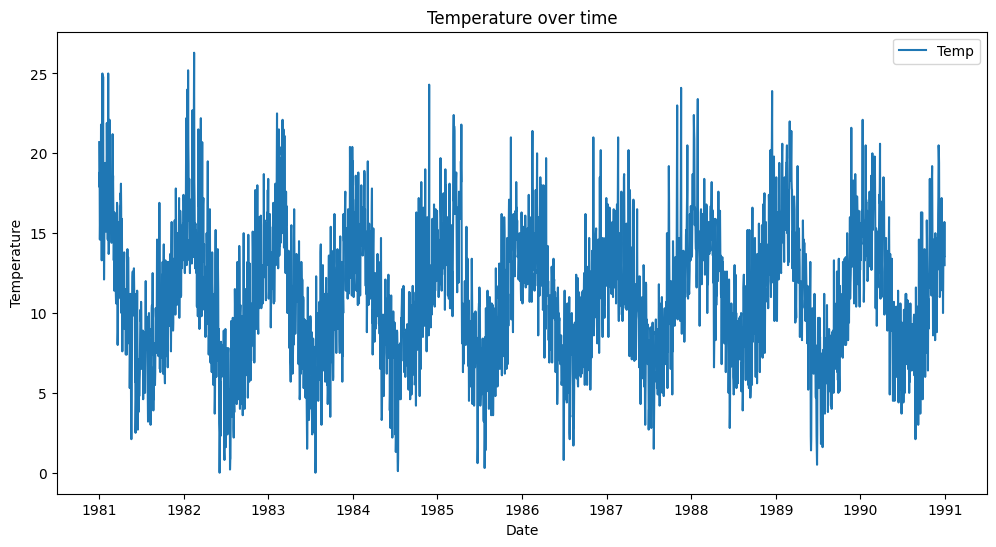

In [20]:
plt.figure(figsize=(12,6), dpi=100)
plt.plot(data["Temp"], label="Temp")
plt.title("Temperature over time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()